In [1]:
import yfinance as yf
from datetime import datetime
import pandas as pd 
import numpy as np
import warnings
# Filter out all warnings
warnings.filterwarnings("ignore")


In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-13 00:00:00-04:00,4100.040039,4150.259766,4099.399902,4146.220215,3596590000,0.0,0.0
2023-04-14 00:00:00-04:00,4140.109863,4163.189941,4113.200195,4137.640137,3575690000,0.0,0.0
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-04-05 00:00:00-04:00', '2023-04-06 00:00:00-04:00',
               '2023-04-10 00:00:00-04:00', '2023-04-11 00:00:00-04:00',
               '2023-04-12 00:00:00-04:00', '2023-04-13 00:00:00-04:00',
               '2023-04-14 00:00:00-04:00', '2023-04-17 00:00:00-04:00',
               '2023-04-18 00:00:00-04:00', '2023-04-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23939, freq=None)

In [6]:
sp500.index = pd.to_datetime(sp500.index)

<Axes: xlabel='Date'>

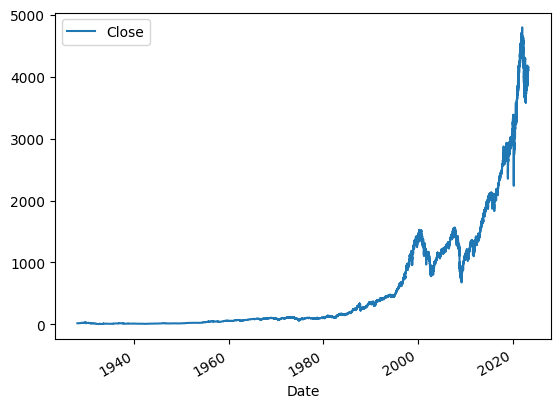

In [7]:
sp500.plot.line(y="Close",use_index=True)

In [8]:
# We are removing them because they are not appropriate for Index analysis they are good for particular stock 
del sp500['Dividends']
del sp500['Stock Splits']

In [9]:
# We created future price column
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-04-13 00:00:00-04:00,4100.040039,4150.259766,4099.399902,4146.220215,3596590000,4137.640137
2023-04-14 00:00:00-04:00,4140.109863,4163.189941,4113.200195,4137.640137,3575690000,4151.319824
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117


In [11]:
# now we are creating a column will show 1 when price goes up and 0 when it goes down 
# this will create a boolean but lets convert this in integer so we can use it in ML 
sp500['Target'] = (sp500["Tomorrow"] > sp500['Close']).astype(int)

# Cleaning and Visualizing the data 

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-04-13 00:00:00-04:00,4100.040039,4150.259766,4099.399902,4146.220215,3596590000,4137.640137,0
2023-04-14 00:00:00-04:00,4140.109863,4163.189941,4113.200195,4137.640137,3575690000,4151.319824,1
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117,1


In [13]:
#we are gonna remove all the data before 1990s 
sp500 = sp500.loc["1990-01-01":].copy()

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-04-13 00:00:00-04:00,4100.040039,4150.259766,4099.399902,4146.220215,3596590000,4137.640137,0
2023-04-14 00:00:00-04:00,4140.109863,4163.189941,4113.200195,4137.640137,3575690000,4151.319824,1
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117,1


* Now lets train initial model

* RandomForestClassifier is good for this type of analysis because it has less chances of overfitting the model 
* It can pickup non-linear tendancies in the data 

In [15]:
from sklearn.ensemble import RandomForestClassifier
# heiger n_estimators the more accuracy you get but the slow the model gets train and min_samples_split helps protect against overfitting
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = {"Close", "Open", "High", "Low", "Volume"}
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

* preds are in numpy array so we are converting it into pandas series 

In [17]:
type(preds)

numpy.ndarray

In [18]:
preds = pd.Series(preds, index=test.index)

In [19]:
# testing our model accuracy 
precision_score(test["Target"],preds)

0.5

In [20]:
# to see data and plotting them we are concating dataset 
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

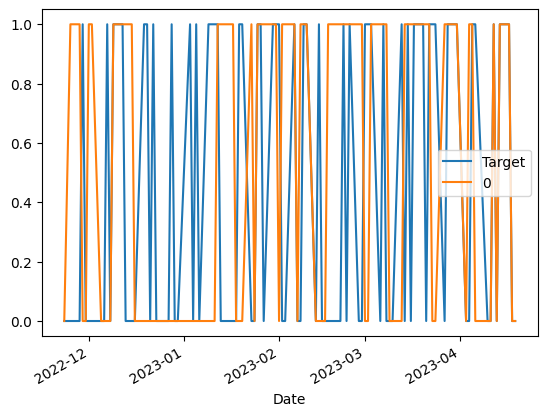

In [21]:
combined.plot()

# Building a backtesting System 
* Currently we are only testing our dataset against 100 days but we want to use this model in real world for that we will use creating backtesting system to test our data against multiple years of data 

In [22]:
# to enable backtesting we are creating prediction function 
def predict(train, test, predictors, model):
    # fitting the model
    model.fit(train[predictors], train["Target"])
    # generating our predictions
    preds = model.predict(test[predictors])
    # preds are in numpy array so we are converting it into pandas series 
    preds = pd.Series(preds, index=test.index, name="predictions")
    # combine everthing together 
    combined = pd.concat([test["Target"],preds],axis=1)
    # return our combined dataframe with the actual values in the predictions 
    return combined

In [23]:
# now lets write our backtest function 
# start=2500 [ we should have certain amount of data to train the model and every year there are 250 trading days ]
# so we are taking 10 years of data to train the first model 
# step=250 [ it means we are training a data 1 by 1 year ]
# so we are testing our data for 10 years and then predict what will be the next 11 year market is then train 11 years predict 12th year and so on..
def backtest(data, model, predictors, start=2500, step=250):
# creating all_predictions list to store every single predictions year data 
    all_predictions = []
    #creating a loop for year by year and make predictions for all the year except first 10 years 
    for i in range(start, data.shape[0], step):
        #splitting data 
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        # generate predictions
        predictions = predict(train, test, predictors, model)
        # append predictions for the given years
        all_predictions.append(predictions)
    # concatenating all of our predictions and returing it 
    return pd.concat(all_predictions)

In [24]:
# backtesting the dataset we have and the previous model and predictors we have created
predictions = backtest(sp500, model, predictors)

In [25]:
predictions["predictions"].value_counts()

0    3324
1    2565
Name: predictions, dtype: int64

In [26]:
precision_score(predictions["Target"],predictions["predictions"])

0.5270955165692007

In [27]:
# is that score good enough 
# for checking that as a benchmark we can see percentage of days where actully market went up
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533877
0    0.466123
Name: Target, dtype: float64

# Adding additional predictors to our model 

In [28]:
# we'll calculate the mean of close price range in the last 2 days, last week, last 3 month 60 days , last year and last 4 year 
# then will find ratio between today's closing price and closing price in these periods 
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    # calculating rolling averages against that horizon  
    rolling_average = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    # adding rolling average and ratio column in the dataset 
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]
    # trend = number of days [horizons] that the stock actully went up 
    trend_column = f"Trend{horizon}"
    #sum of the days that the stock actully went up
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    # add all to the new_predictors 
    new_predictors += [ratio_column, trend_column]

In [29]:
sp500 = sp500.dropna()

In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend2,Close_Ratio_5,Trend5,Close_Ratio_60,Trend60,Close_Ratio_250,Trend250,Close_Ratio_1000,Trend1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 00:00:00-04:00,4121.720215,4134.370117,4086.939941,4091.949951,3633120000,4146.220215,1,0.997928,0.0,0.997774,2.0,1.016251,30.0,1.030438,114.0,1.100472,532.0
2023-04-13 00:00:00-04:00,4100.040039,4150.259766,4099.399902,4146.220215,3596590000,4137.640137,0,1.006588,1.0,1.008261,3.0,1.029067,31.0,1.044421,114.0,1.114702,533.0
2023-04-14 00:00:00-04:00,4140.109863,4163.189941,4113.200195,4137.640137,3575690000,4151.319824,1,0.998964,1.0,1.004581,2.0,1.026052,31.0,1.042527,114.0,1.112033,533.0


In [31]:
model  = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    # To get more control of what outcome we get we implemented predict_proba method and get the second column
    preds = model.predict_proba(test[predictors])[:,1]
    # We are setting our own custom threshold here and we are changing it from default settings [50%] to 60 percent to show it 1
    # It will reduce total numbers of trading days and reduce the days that predict 1 but will get more chances that it will actully go up
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    # preds are in numpy array so we are converting it into pandas series 
    preds = pd.Series(preds, index=test.index, name="predictions")
    # combine everthing together 
    combined = pd.concat([test["Target"], preds],axis=1)
    # return our combined dataframe with the actual values in the predictions 
    return combined

In [33]:
# backtesting the dataset we have and the previous model and predictors we have created
predictions = backtest(sp500, model, new_predictors)

In [34]:
predictions["predictions"].value_counts()

0.0    4075
1.0     813
Name: predictions, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["predictions"])

0.5694956949569495